In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
enrich_dir = "/data6/deepro/ukb_bmi/3_characterization/data/enrichment/british/bonf_001"
enrich_database = ["KEGG_2021_Human_enrich", "GTEx_Tissues_V8_2023_enrich", "GO_Biological_Process_2023_enrich", "dbGaP_enrich"]

In [3]:
def create_dot_plot(go_file, terms_col="Term", odds_ratio_col="odds_ratio", gene_col="genes", gene_pval_col="adj_pval", ncat=20, figsize=(6,7)):
    # read and parse go file
    go_df = pd.read_csv(go_file)
    go_df[terms_col] = go_df[terms_col].apply(lambda x: x[0].upper() + x[1:])
    go_df["gene_counts"] = go_df[gene_col].apply(lambda x: len(x.split("|")))
    plot_df = go_df.sort_values(gene_pval_col).head(ncat)
    
    plot_df = plot_df.sort_values(odds_ratio_col, ascending=False)
    fig, axes = plt.subplots(figsize=figsize)
    norm = plt.Normalize(0, 0.05) # plot_df['qvalue'].min(), plot_df['qvalue'].max()
    sns_ax = sns.scatterplot(
        data=plot_df, x=odds_ratio_col, y=terms_col, 
        size="gene_counts", hue=gene_pval_col, ax=axes, sizes=(100, 300), palette='RdBu', hue_norm=norm, linewidth=0.5, edgecolor="k"
        )
    sns_ax.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), ncol=1)
    sns_ax.set_xlabel("Gene ratio")
    sns_ax.set_ylabel("")
    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
    sm.set_array([])
    sns_ax.figure.colorbar(sm, ax=axes, shrink=0.25, aspect=5, ticks=[0, 0.01, 0.05])
    # axes.margins(x=0.1, y=0.1)
    return fig, axes

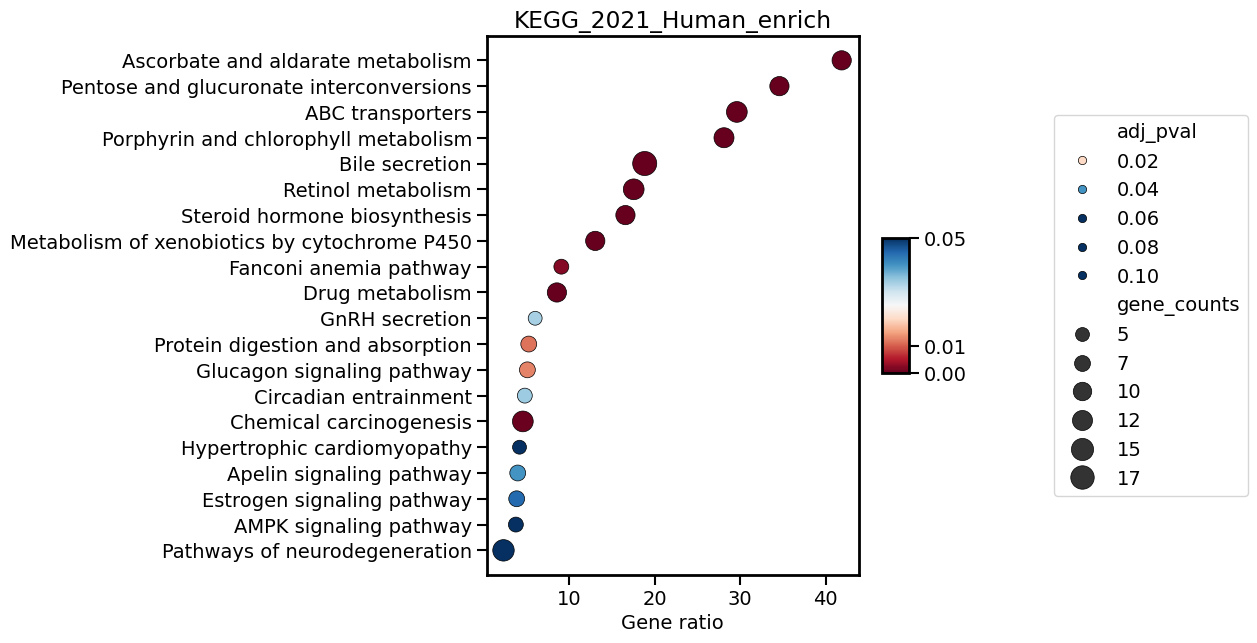

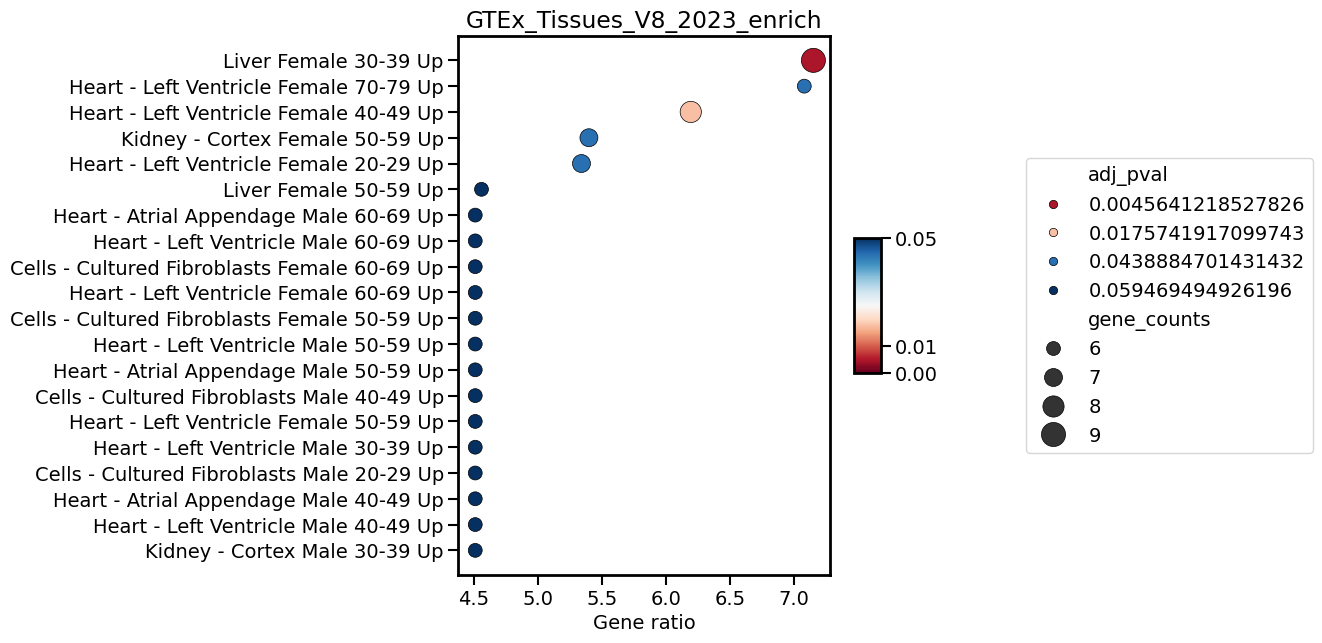

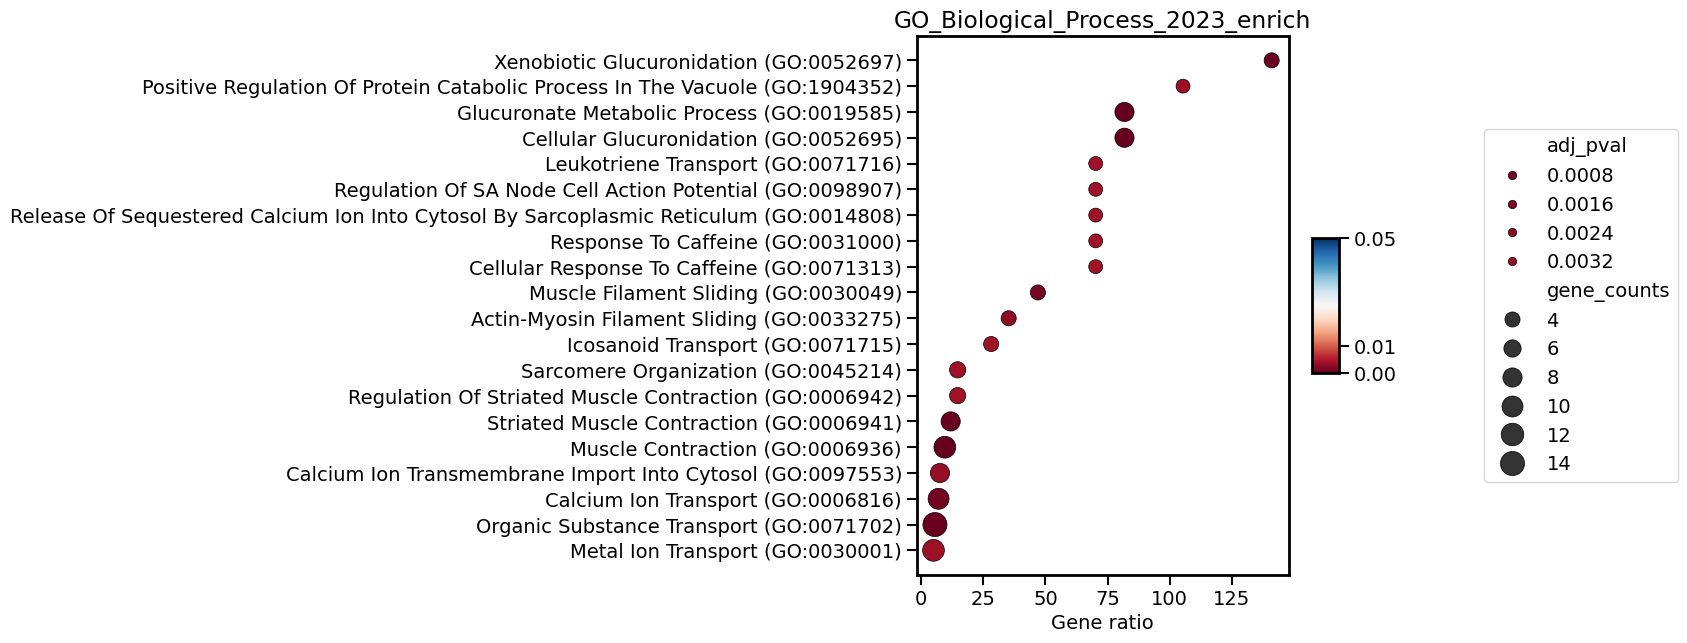

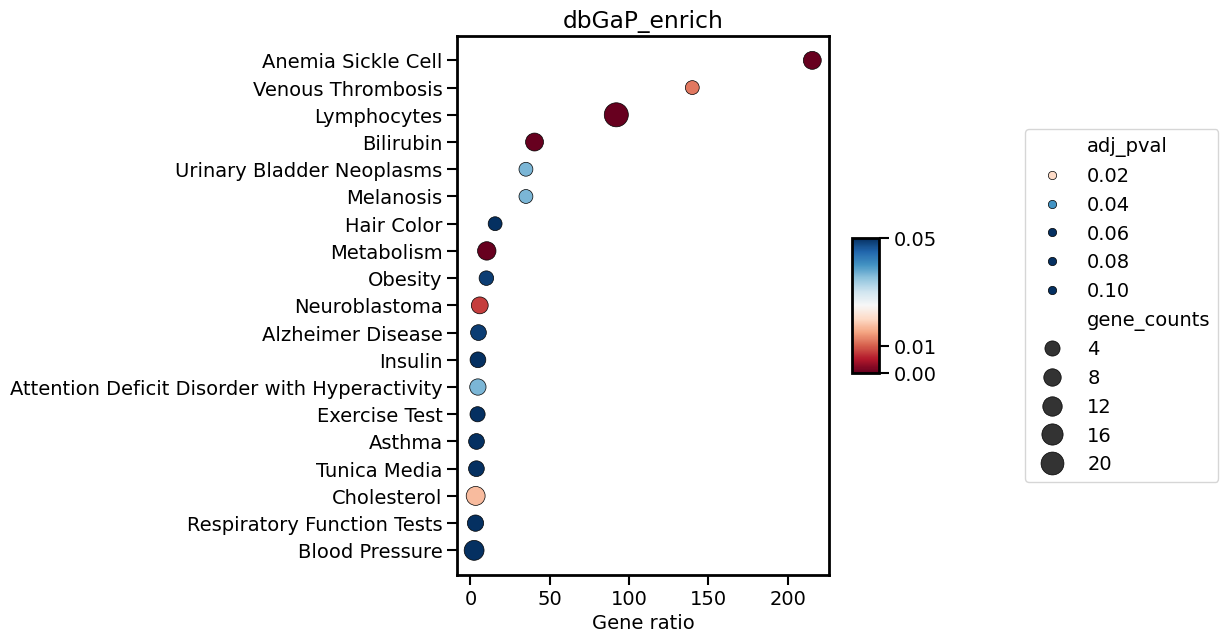

In [4]:
for ed in enrich_database:
    enrich_file = os.path.join(enrich_dir, f"{ed}.csv")
    fig, ax = create_dot_plot(enrich_file, ncat=20)
    ax.set_title(f"{ed}")